In [1]:
#!/usr/bin/env python3.6
# -*- coding: utf-8 -*-

In [2]:
# Imports
import sys
import joblib
import numpy as np
from matplotlib import animation
from IPython.display import HTML
from matplotlib import pyplot as plt
import mpl_toolkits.mplot3d.axes3d as p3

In [3]:
#np.random.seed(20)
np.set_printoptions(threshold=sys.maxsize)

In [4]:
%matplotlib inline

In [5]:
%store -r X_relative_footsteps_continuous_absolute
%store -r Y_relative_footsteps_continuous_absolute
print(X_relative_footsteps_continuous_absolute.shape)
print(Y_relative_footsteps_continuous_absolute.shape)

(2061, 32)
(2061, 4)


# Multivariate Linear Regression (Foot prediction)

In [6]:
import sklearn
from sklearn import metrics
from sklearn.feature_selection import RFE
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [7]:
# Entries where FR is swinging
idxs = np.where(X_relative_footsteps_continuous_absolute[:, 22] == 1)[0]
X_relative_footsteps_continuous_absolute_FR_swinging = X_relative_footsteps_continuous_absolute[idxs]
Y_relative_footsteps_continuous_absolute_FR_swinging = Y_relative_footsteps_continuous_absolute[idxs]

In [8]:
print("Percentage of footstep where FR and RL are swinging: ", len(idxs)/len(X_relative_footsteps_continuous_absolute) * 100)

Percentage of footstep where FR and RL are swinging:  49.58757884522076


## Predict FR foot -> x

In [9]:
X_relative_footsteps_continuous_absolute_FR_swinging[0, :]

array([ 0.1       ,  0.        ,  0.        ,  0.02903117,  0.01182563,
        0.01990151, -0.03739399,  0.01173486, -0.01169843,  0.23700837,
        0.17266518, -0.43157344,  0.2359204 , -0.17338123, -0.43200242,
       -0.2455929 ,  0.16223909, -0.43042291, -0.24254318, -0.16515523,
       -0.42941486,  0.        ,  1.        ,  1.        ,  0.        ,
        0.1       ,  0.        ,  0.        , -0.01763056, -0.00411756,
       -0.00781847, -0.01257138])

In [10]:
Y_relative_footsteps_continuous_absolute_FR_swinging[0, :]

array([ 0.01621454, -0.00425104,  0.01737835, -0.00151273])

### Linear Regression

In [11]:
# Input
X = np.hstack((X_relative_footsteps_continuous_absolute_FR_swinging[:, :3], # motion command
               X_relative_footsteps_continuous_absolute_FR_swinging[:, 9:11], # FL (x,y) position
               X_relative_footsteps_continuous_absolute_FR_swinging[:, 12:14], # FR (x,y) position
               X_relative_footsteps_continuous_absolute_FR_swinging[:, 15:17], # RL (x,y) position
               X_relative_footsteps_continuous_absolute_FR_swinging[:, 18:20])) # RR (x,y) position

# Target
Y = np.array([Y_relative_footsteps_continuous_absolute_FR_swinging[:, 0]]).T

assert Y.shape[0] == X.shape[0]

# Split data into train and test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.8, shuffle=True, random_state=100)

# Create the model
model_fr_relative_swinging_x = LinearRegression()

# Fit the model
model_fr_relative_swinging_x.fit(X_train, Y_train)

# Predict
predictions = model_fr_relative_swinging_x.predict(X_test)

# Stats
print('R2: ', r2_score(predictions, Y_test))
print('RMSE: ', np.sqrt(mean_squared_error(Y_test, predictions)))
print("The lowest error is: ", np.min(np.abs(predictions - Y_test)))
print("The highest error is: ", np.max(np.abs(predictions - Y_test)))
print("The avg. error is: ", np.mean(np.abs(predictions - Y_test)))
#print("Seq of errors (descendant): \n", sorted(np.abs(predictions - Y_test).tolist(), reverse=True))

R2:  0.9995850129666408
RMSE:  0.0008187937714316187
The lowest error is:  2.1732404472118994e-06
The highest error is:  0.005683444075056943
The avg. error is:  0.0004930186824488498


In [12]:
model_fr_relative_swinging_x.coef_

array([[ 2.07999921e-01, -2.22044605e-16,  3.33066907e-16,
        -1.64029935e-01,  2.71483233e-01, -6.05881047e-01,
        -2.23305693e-01,  1.90504479e-01,  8.89436422e-02,
         2.80634468e-01,  5.10859701e-01]])

In [13]:
model_fr_relative_swinging_x.intercept_

array([0.27644523])

Text(0, 0.5, 'Predictions')

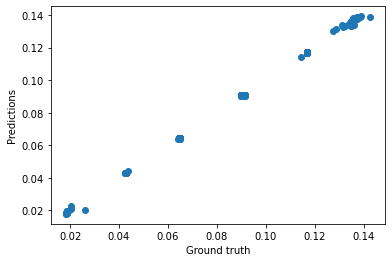

In [14]:
## The line / model
plt.scatter(Y_test, predictions)
plt.xlabel("Ground truth")
plt.ylabel("Predictions")

In [15]:
#%store model_fr_relative_swinging_x

In [16]:
#for idx, prediction in enumerate(predictions):
#    print(f'Start: {X_test[idx, 6]}. Groundtruth: {Y_test[idx]}. Predicted: {prediction}')

In [17]:
# Save model
#joblib.dump(model_fr_relative_swinging_x, "/home/itaouil/workspace/aliengo_ws/src/aliengo_navigation/models/protocol3/relative/model_fr_relative_swinging_x.sav")

### Predict FR foot -> y

In [18]:
# Input
X = np.hstack((X_relative_footsteps_continuous_absolute_FR_swinging[:, :3], # motion command
               X_relative_footsteps_continuous_absolute_FR_swinging[:, 9:11], # FL (x,y) position
               X_relative_footsteps_continuous_absolute_FR_swinging[:, 12:14], # FR (x,y) position
               X_relative_footsteps_continuous_absolute_FR_swinging[:, 15:17], # RL (x,y) position
               X_relative_footsteps_continuous_absolute_FR_swinging[:, 18:20])) # RR (x,y) position

# Target
Y = np.array([Y_relative_footsteps_continuous_absolute_FR_swinging[:, 1]]).T

assert Y.shape[0] == X.shape[0]

# Split data into train and test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.8, shuffle=True, random_state=100)

# Create the model
model_fr_relative_swinging_y = LinearRegression()

# Fit the model
model_fr_relative_swinging_y.fit(X_train, Y_train)

# Predict
predictions = model_fr_relative_swinging_y.predict(X_test)

# Stats
print('R2: ', r2_score(predictions, Y_test))
print('RMSE: ', np.sqrt(mean_squared_error(Y_test, predictions)))
print("The lowest error is: ", np.min(np.abs(predictions - Y_test)))
print("The highest error is: ", np.max(np.abs(predictions - Y_test)))
print("The avg. error is: ", np.mean(np.abs(predictions - Y_test)))
#print("Seq of errors (descendant): \n", sorted(np.abs(predictions - Y_test).tolist(), reverse=True))

R2:  -0.16583613680038867
RMSE:  0.0006301293711958262
The lowest error is:  1.5208652859310945e-07
The highest error is:  0.005524716756425241
The avg. error is:  0.00035192817057569235


In [19]:
model_fr_relative_swinging_y.coef_

array([[-1.02767837e-02,  1.29063427e-15, -9.15933995e-16,
         5.43356153e-01,  7.73858708e-01, -1.66753437e-01,
         1.80977695e-01,  1.36816713e-02, -6.69930487e-02,
        -4.66168787e-01, -7.22425477e-01]])

In [20]:
model_fr_relative_swinging_y.intercept_

array([-0.4130806])

Text(0, 0.5, 'Predictions')

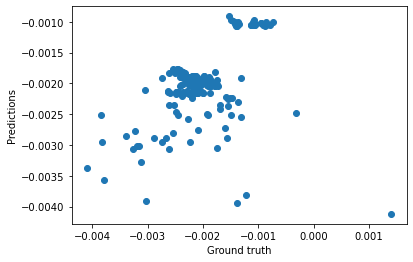

In [21]:
## The line / model
plt.scatter(Y_test, predictions)
plt.xlabel("Ground truth")
plt.ylabel("Predictions")

In [21]:
#%store model_fr_relative_swinging_y

In [24]:
#for idx, prediction in enumerate(predictions):
#    print(f'Groundtruth: {Y_test[idx]}. Predicted: {prediction}')

In [25]:
# Save model
#joblib.dump(model_fr_relative_swinging_y, "/home/itaouil/workspace/aliengo_ws/src/aliengo_navigation/models/protocol3/relative/model_fr_relative_swinging_y.sav")